In [1]:
import yaml

In [2]:
from utils.helper import * 
from models.build_model import *

In [3]:
import seaborn as sns
box_plot_colors = sns.color_palette("Set2")
kfold = 10
split_rate=0.1
facecolor = "#FF8C94"
patchcolor = 'red'
alpha = 0.3
# xlim = (0, 120)
# ylim = (0, 120)
xlim = None
ylim = None

### run ANN model

In [4]:
ann_config_path = 'configs/ann.yaml'
with open(ann_config_path, "r") as f:
    config = yaml.safe_load(f)
ann_save_path = config["Dataset"]["save_path"]
model = build_model(config)
ann_val_res = train_model(model)
ann_test_res = predict_model_on_other_dataset(config, model) 

### run Random Forest Model

In [5]:
rf_config_path = 'configs/random_forest.yaml'
with open(rf_config_path, "r") as f:
    config = yaml.safe_load(f)
rf_save_path = config["Dataset"]["save_path"]
model = build_model(config)
rf_val_res = train_model(model)
rf_test_res = predict_model_on_other_dataset(config, model) 

### run XGBoost Model

In [6]:
xgb_config_path = 'configs/xgboost.yaml'
with open(xgb_config_path, "r") as f:
    config = yaml.safe_load(f)
xgb_save_path = config["Dataset"]["save_path"]
model = build_model(config)
xgb_val_res = train_model(model)
xgb_test_res = predict_model_on_other_dataset(config, model) 

### run Ridge Model

In [7]:
ridge_config_path = 'configs/ridge_regression.yaml'
with open(ridge_config_path, "r") as f:
    config = yaml.safe_load(f)
ridge_save_path = config["Dataset"]["save_path"]
model = build_model(config)
ridge_val_res = train_model(model)
ridge_test_res = predict_model_on_other_dataset(config, model)

### draw box plot

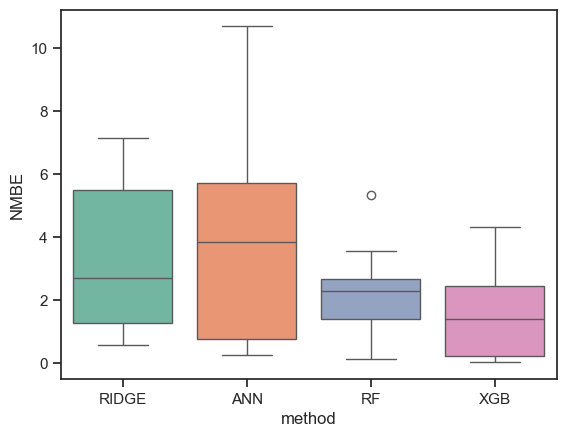

In [8]:
ridge_result_summary = f"{ridge_save_path}/results_summary.csv"
rf_result_summary = f"{rf_save_path}/results_summary.csv"
xgb_result_summary = f"{xgb_save_path}/results_summary.csv"
ann_result_summary = f"{ann_save_path}/results_summary.csv"

ridge_result_summary = read_csv(ridge_result_summary)
rf_result_summary = read_csv(rf_result_summary)
xgb_result_summary = read_csv(xgb_result_summary)
ann_result_summary = read_csv(ann_result_summary)

# make sure the order match the name lists!!!
result_lists = [ridge_result_summary, ann_result_summary, rf_result_summary, xgb_result_summary]
name_lists = ["RIDGE","ANN", "RF", "XGB"]
metric_lists = ["RMSE", "MAE", "R2", "RSR", "MAPE", "NMBE"]
plt.close("all")
df = draw_box_plot(result_lists, name_lists, metric_lists, box_plot_colors=box_plot_colors)

### draw relative plots

drawing relative plots


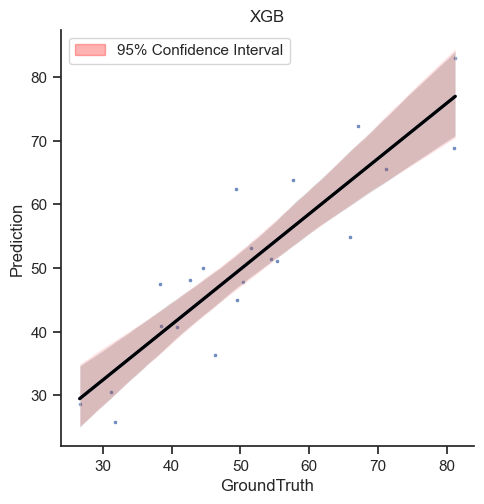

In [9]:
print("drawing relative plots")
plt.close("all")
ridge_result = f"{ridge_save_path}"
rf_result = f"{rf_save_path}"
xgb_result = f"{xgb_save_path}"
ann_result = f"{ann_save_path}"
result_lists = [ridge_result, rf_result, xgb_result, ann_result]
draw_regplots(result_lists, name_lists, folds=kfold, facecolor=facecolor, patchcolor=patchcolor, alpha=alpha, xlim=xlim, ylim=ylim)
